# Designed Experiments

Logistic regression is useful in interpreting the outcome of structured experiments, where the outcome of a stimulus is a proportion (such as in a survey, 1000 sent, 300 reply and similar situations).  In such cases the $\pi_i$ function is unchanged but has a different meaning; instead or observed responses appearing binary we are interested in the proportion of binary responses in a group. In that case

$$ p_j = \frac{R_j}{n_j} $$

where $p_j$ is the proportion of 1s in a category (or level) of stimulus.

In this case the error is

$$\epsilon_j=p_j - \frac{e^{X_j~\beta}}{1+e^{X_j~\beta}}$$

and the function to minimize is 

$$\min_{\beta} (\overrightarrow{p} - \pi(\beta))^T(\overrightarrow{p}-\pi(\beta))$$

Consider an illustrative example below

## Redemption Rate vs Rebate Value

A marketing study to estimate the effectiveness of coupons offering a price reduction on a given product selected 1000 participants and a coupon and advertising material were distributed to each participant.  The coupons offered different price reductions (5,10,15,20, and 30 dollars) and 200 participants were randomly selected for each price reduction level.

The predictor feature is the price reduction, and the response is the number redemmed after a specified time.  The data  are tabulated below

|Level $j$|Price Reduction $X_j$|Participants $n_j$|Redeemed $R_j$|
|---:|---:|---:|---:|
|1|5|200|30|
|2|10|200|55|
|3|15|200|70|
|4|20|200|100|
|5|30|200|137|

As with our typical ML workflow, first we assemble the data, and make any preparatory computations (in this case the proportions)


In [1]:
# Load The Data
level = [1,2,3,4,5]
reduction = [5,10,15,20,30]
participants = [200,200,200,200,200]
redeemed = [30,55,70,100,137]
proportion = [0 for i in range(len(level))]
for i in range(len(proportion)):
    proportion[i]=redeemed[i]/participants[i]

Next some exploratory data analysis (mostly just a plot of the data)

In [2]:
import matplotlib.pyplot as plt
def make1plot(listx1,listy1,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (6,6)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.grid(which='both',axis='both')
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.grid(axis='y')
    plt.show()

%matplotlib inline

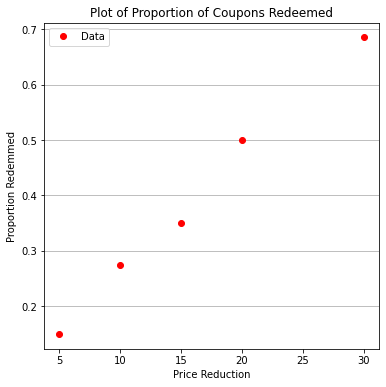

In [3]:
make1plot(reduction,proportion,'Price Reduction','Proportion Redemmed','Plot of Proportion of Coupons Redeemed')

From this plot we can observe the more stimmys the more coupons redemmed (and relatedly the more crappy product is moved off the store shelves). Now suppose we actually want to predict response for values outside our study range.  A logistic regression model can give some insight.

Next define our functions (they are literally the same and in the prior example, with names changed to access the correct data)

In [4]:
def pii(b0,b1,x): #sigmoidal function
    import math
    pii = math.exp(b0+b1*x)/(1+ math.exp(b0+b1*x))
    return(pii)

def sse(mod,obs): #compute sse from observations and model values
    howmany = len(mod)
    sse=0.0
    for i in range(howmany):
        sse=sse+(mod[i]-obs[i])**2
    return(sse)

def merit(beta): # merit function to minimize
    global proportion,reduction #access lists already defined external to function
    mod=[0 for i in range(len(proportion))]
    for i in range(len(level)):
        mod[i]=pii(beta[0],beta[1],reduction[i])
    merit = sse(mod,proportion)
    return(merit)


Make an initial guess to test the merit function

In [5]:
beta = [0,0] # initial guess
merit(beta) # test for exceptions

0.22985

Insert our optimizer (for the homebrew use powell's method)

Optimization terminated successfully.
         Current function value: 0.002032
         Iterations: 3
         Function evaluations: 88
 b0 =  -2.0165402749739756
 b1 =  0.09580373659184761


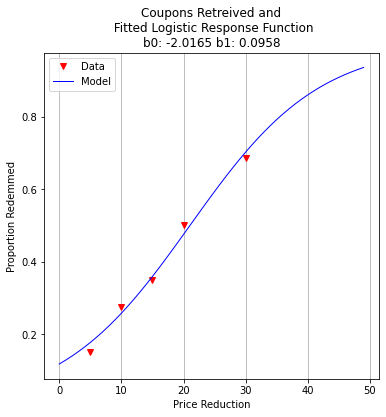

In [6]:
import numpy as np
from scipy.optimize import minimize

x0 = np.array([-2,0.09])
res = minimize(merit, x0, method='powell',options={'disp': True})
# 
fitted=[0 for i in range(50)]
xaxis =[0 for i in range(50)]
for i in range(50):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))
    
print(" b0 = ",res.x[0])
print(" b1 = ",res.x[1])

plottitle = 'Coupons Retreived and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed',plottitle)

Now we can interrogate the model.  For example what reduction will achieve 50-percent redemption)?

In [7]:
guess = 21.05
fraction = pii(res.x[0],res.x[1],guess)
print("For Reduction of ",guess," projected redemption rate is ",round(fraction,3))

For Reduction of  21.05  projected redemption rate is  0.5


Suppose we want 98-percent redemption (a really crappy as seen on TV product we want out of our retail chain, but still want some revenue)

In [8]:
guess = 61.90
fraction = pii(res.x[0],res.x[1],guess)
print("For Reduction of ",guess," projected redemption rate is ",round(fraction,3))

For Reduction of  61.9  projected redemption rate is  0.98


For client management, we might be better off with a graph

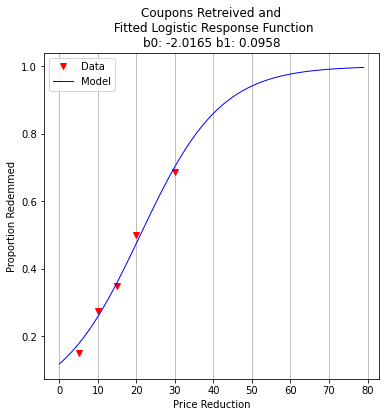

In [9]:
fitted=[0 for i in range(80)]
xaxis =[0 for i in range(80)]
for i in range(80):
    xaxis[i]=float(i)
    fitted[i]=pii(res.x[0],res.x[1],float(i))

plottitle = 'Coupons Retreived and\n Fitted Logistic Response Function\n'+'b0: '+ str(round(res.x[0],4))+ ' b1: ' +str(round(res.x[1],4))
make2plot(reduction,proportion,xaxis,fitted,'Price Reduction','Proportion Redemmed',plottitle)

## Exercises

## References